In [1]:
#import libraries
import numpy as np
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt
import random
from scipy.stats import chisquare



In [2]:
def benford_x_digit(rawdata,digit):
    data_nonzero=filter(lambda n: n !=0. , rawdata)
    data=list(data_nonzero)
    BFD= [math.log10(1+1/n) for n in range (10**(digit-1),10**digit)]
    data_count={}
    for i in range(10**(digit-1),10**digit):
        data_count[i]=0      
    data_xdigits=[int(str(abs(x*1000))[0:digit]) for x in data]
    for i in range(len(data_xdigits)):
            data_count[data_xdigits[i]]=data_count[data_xdigits[i]]+1
    list_tuples=sorted(data_count.items())
    data_count=[i[1] for i in list_tuples]
    total_count=sum(data_count)
    expected_count=[p * total_count for p in BFD]
    return  data_count, expected_count




In [3]:
def chi_square_test(data_count,digit):
    total_count=sum(data_count)  
    BFD= [math.log10(1+1/n) for n in range (10**(digit-1),10**digit)]
    expected_count=[p * total_count for p in BFD] 
    chisq, pvalue = chisquare(data_count, f_exp=expected_count) 
    return chisq , pvalue

    

In [4]:
def plot_benford(data,digit):   
    data_count, expected_count =benford_x_digit(data,digit)
    chisquare, pvalue = chi_square_test(data_count,digit)
    print("CHI square statistic:",chisquare)
    print ("p value",pvalue)
    y1 = expected_count
    y2 = data_count
    x= np.arange(10**(digit-1),10**digit)
    bins = np.linspace(1, 10)
    width=.35
    plt.bar(x, y1, width, label="Benford")
    plt.bar(x+width, y2, width, label="Actual")
    plt.xticks(x+width/2 , x)
    plt.legend(loc='upper right')
    plt.show()

In [17]:

#data=[4,1,2,3,4,10,2,4,334,667,878,989,7,12,22,100,132,144,167,1000,190,58,299,4,30,500,0,72,-1,0.02,999999,100,111,34,111,12,3,5,7,6,8,9,6,23,3,6,214,38,1,223,2,11,223,4,1,2,33,4,55,]

df= pd.read_excel("data.xlsx")
df



,Unnamed: 0,field1,field2,field3
0,0,-10,618,-64585
1,1,-38,707,20392
2,2,29,-626,-15801
3,3,-4,-152,-11879
4,4,-31,-3999,23011
...,...,...,...,...
9995,9995,-11,96,-2867
9996,9996,81,5,54
9997,9997,-156,-7830,1845984
9998,9998,236,-10566,-217667


10000
CHI square statistic: 83.69007025595583
p value 0.6390612009674321


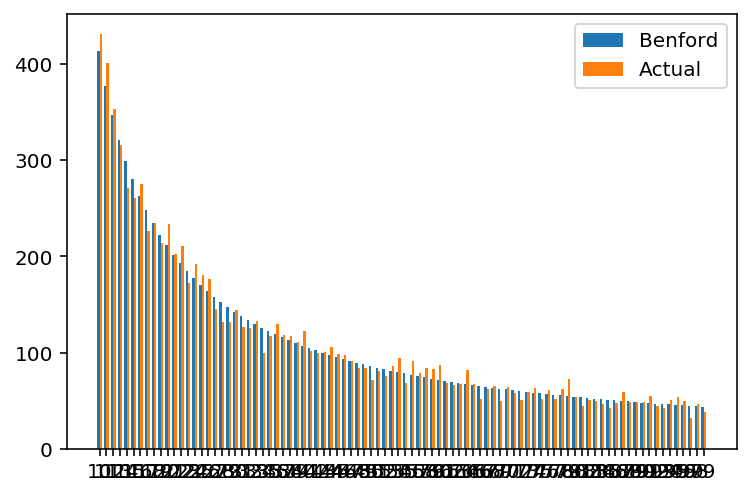

In [18]:
data=df["field3"].tolist()
print(len(data))
plot_benford(data,2)
